In [28]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.calibration import LabelEncoder
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv("updated_cleaned_recipe_dataset.csv")

# Print the dataset
print(data)


                         Recipe  \
0                     Apple Pie   
1                   Beef Burger   
2                     Beef Stew   
3                Broccoli Salad   
4                   Carrot Cake   
..                          ...   
89          Korean Bulgogi Beef   
90  Jamaican Ackee and Saltfish   
91      Lebanese Fattoush Salad   
92          Thai Massaman Curry   
93            Italian Osso Buco   

                                           Ingredient Recipe Category  \
0   ['Apple', 'Sugar', 'Flour', 'Butter', 'Cinnamon']       American    
1   ['Ground beef', 'Lettuce', 'Tomato', 'Bun', 'C...       American    
2   ['Beef', 'Potatoes', 'Carrots', 'Beef broth', ...          French   
3   ['Broccoli florets', 'Almonds', 'Dried cranber...        American   
4    ['Carrot', 'Flour', 'Sugar', 'Eggs', 'Cinnamon']        European   
..                                                ...             ...   
89  ['Beef', 'Soy sauce', 'Sesame oil', 'Garlic', ...          Korea

In [29]:
# Handle missing values if any
data.dropna(inplace=True)

In [30]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [31]:
# Split data into features (X) and target variable (y)
# Features: All columns except for Ingredients
X = data.drop(columns=["Ingredient"])  # Features 
y = data["Ingredient"]  # Target variable

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

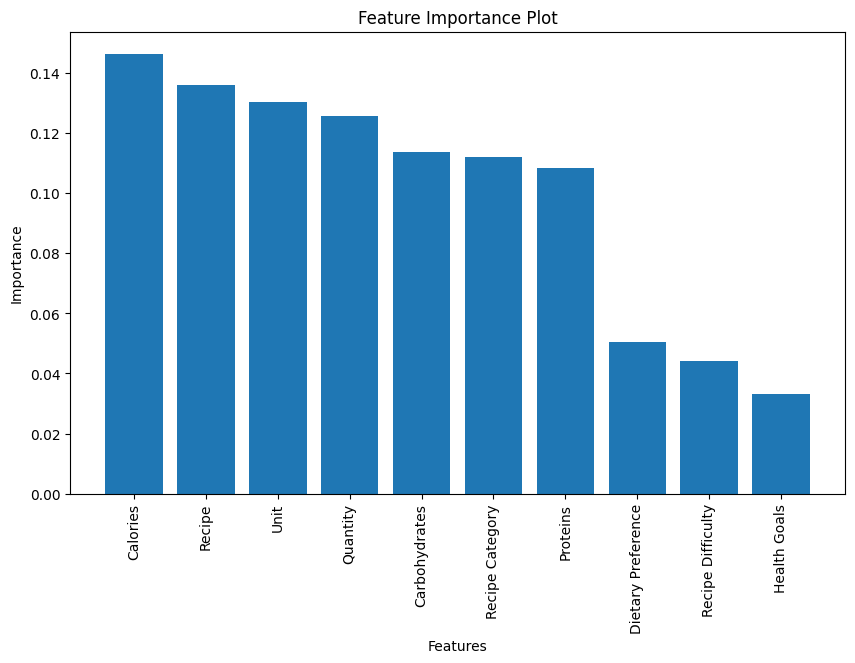

In [33]:
# Which ingredients or other features have the most significant impact on the predicted outcome (ingredient)
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

## IMPORTANCE PLOT

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=90)
plt.show()
